In [1]:
import math
import copy
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# load our dataset
x_train = np.array([0,1,2,3,4,5,6,7,8,9])           # features
y_train = np.array([1,3,2,5,7,8,8,9,10,12])       #target value

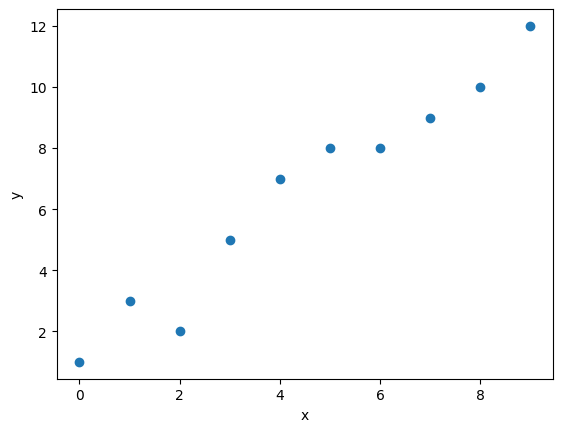

In [3]:
plt.scatter(x_train,y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
# function to  compute the cost
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2
    total_cost = (1 / (2*m))*cost
    return total_cost

In [5]:
# compute gradient descent
def compute_gradient_descent(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db


In [6]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_fuction):
  # an array to store cost j and w's at each iteration primarily for graph
  j_history = []
  p_history = []
  b = b_in
  w = w_in

  for i in range(num_iters):
    # calculate gradient and update the parameters using gradient_descent function
    dj_dw, dj_db = gradient_fuction(x, y, w, b)

    # update parameters
    b = b - alpha * dj_db
    w = w - alpha * dj_dw

    # save cost J at each iteration
    if i < 1000:  # prevent resourse exhaustation
      j_history.append(cost_function(x, y, w, b))
      p_history.append([w, b])

    # print cost every at intervals 10 times or as many iterations as if < 10
    if i % math.ceil(num_iters/10) == 0:
      print(f"iteration {i:4} : cost {j_history[-1]:0.2e} ",
            f"dj_dw : {dj_dw: 0.3e},dj_db : {dj_db :0.3e} ",
            f"w: {w: 0.3e}, b:{b: 0.5e}")
  return w, b, j_history, p_history  # return w and J,w history for graphing


In [7]:
# initialize parameters
w_init = 0
b_init = 0

# some gradient descent settings
iterations = 1000
tmp_alpha = 1.0e-2

# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(
    x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient_descent)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")


iteration    0 : cost 1.38e+01  dj_dw : -3.890e+01,dj_db : -6.500e+00  w:  3.890e-01, b: 6.50000e-02
iteration  100 : cost 3.67e-01  dj_dw :  3.475e-02,dj_db : -2.179e-01  w:  1.292e+00, b: 4.66914e-01
iteration  200 : cost 3.30e-01  dj_dw :  2.619e-02,dj_db : -1.642e-01  w:  1.262e+00, b: 6.56431e-01
iteration  300 : cost 3.09e-01  dj_dw :  1.974e-02,dj_db : -1.238e-01  w:  1.239e+00, b: 7.99269e-01
iteration  400 : cost 2.97e-01  dj_dw :  1.488e-02,dj_db : -9.328e-02  w:  1.222e+00, b: 9.06926e-01
iteration  500 : cost 2.90e-01  dj_dw :  1.121e-02,dj_db : -7.031e-02  w:  1.209e+00, b: 9.88067e-01
iteration  600 : cost 2.86e-01  dj_dw :  8.451e-03,dj_db : -5.299e-02  w:  1.200e+00, b: 1.04922e+00
iteration  700 : cost 2.84e-01  dj_dw :  6.369e-03,dj_db : -3.994e-02  w:  1.192e+00, b: 1.09532e+00
iteration  800 : cost 2.83e-01  dj_dw :  4.801e-03,dj_db : -3.010e-02  w:  1.187e+00, b: 1.13006e+00
iteration  900 : cost 2.82e-01  dj_dw :  3.618e-03,dj_db : -2.269e-02  w:  1.182e+00, b: 1.

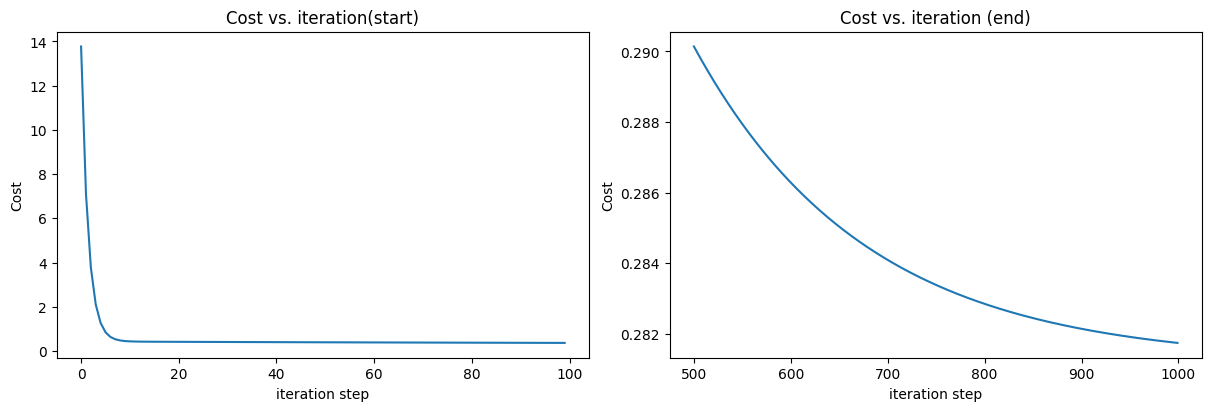

In [8]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist[:100])
ax2.plot(500 + np.arange(len(J_hist[500:])), J_hist[500:])
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()


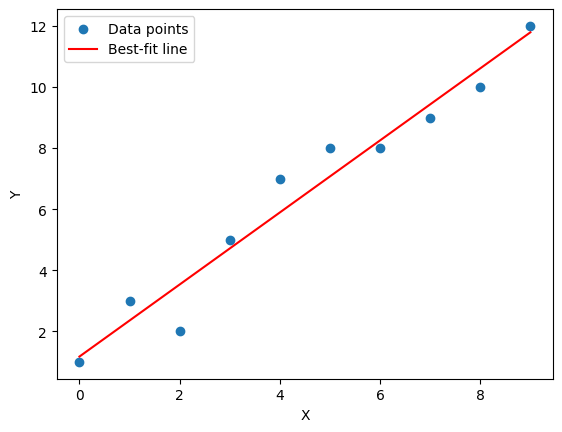

In [9]:
# Predictions using the best-fit line
predictions = b_final +  w_final* x_train

# Plot the data points and the best-fit line
plt.scatter(x_train, y_train, label='Data points')
plt.plot(x_train, predictions, color='red', label='Best-fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [10]:
print("Predicted line : ")
print(" y = " + str(b_final ) +  " + "  + str(w_final ) +  " * x")

Predicted line : 
 y = 1.175803611388339 + 1.1793547634798334 * x


In [11]:
x_new = int(input("Enter X to find value of Y : "))
print("Predicted value of Y : ")
print(b_final +  w_final* x_new)

Predicted value of Y : 
7.072577428787506
